# Compute the entropy of a text 

In this assigment we will compute the entropy of a Shakespeare play's act.
Follow up steps include computiong the mutaula information to understand how good is the approximation of non independent characters.



In [58]:
import numpy as np
import requests # library to easily send HTTP/1.1 requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup
from functools import reduce
import matplotlib.pyplot as plt
import scipy as scp
from scipy import optimize
from scipy import integrate
import textwrap

In [2]:
with open('tempest.txt', mode = 'r') as f:
    text = f.read()

In [3]:
text = text.lower() # convert to lowercase

In [32]:
unique_characters = list(set(text)) # get unique characters

In [33]:
probabilities = {c: text.count(c)/len(text) for c in unique_characters} # get the probability distribution

In [6]:
entropy = - sum([probabilities[char] * np.log2(probabilities[char]) for char in text]) # Entropy of the probability distribution
print(f'The entropy of the probability distribution is {entropy:.2f} bits')

The entropy of the probability distribution is 26854.55 bits


In [7]:
N = len(text)
errors = {c: np.sqrt(probabilities[c]*(1 - probabilities[c])/N)  for c in unique_characters} # get the error of the probability distribution

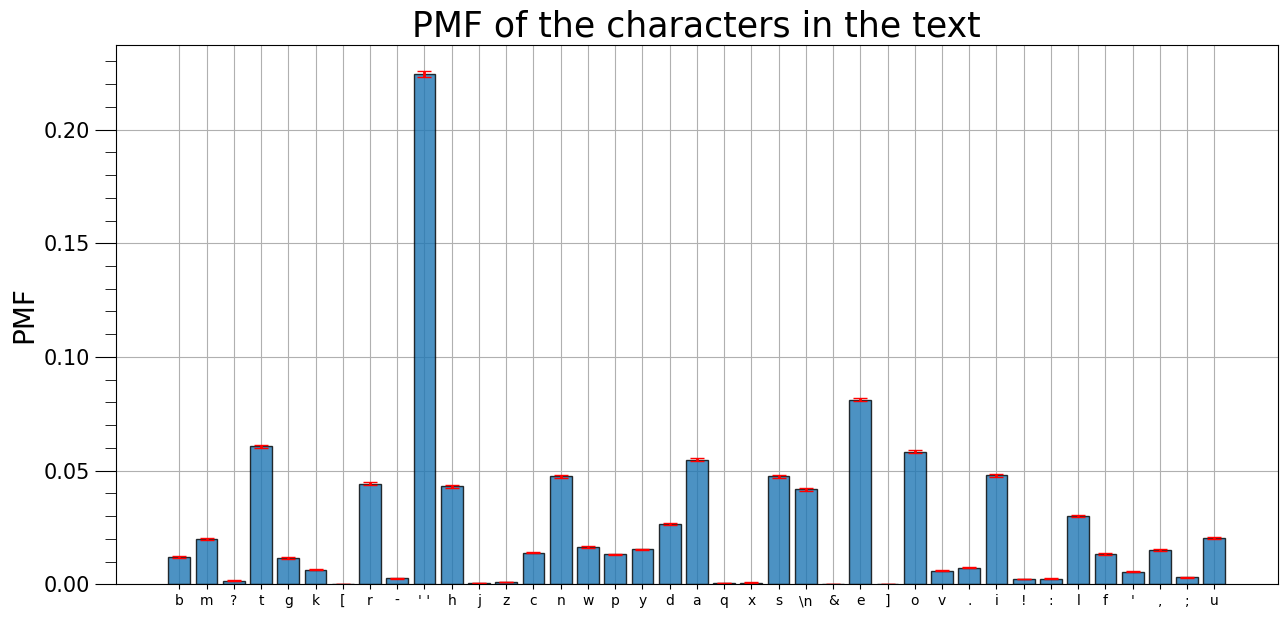

In [8]:
x_ticks_label = list(probabilities.keys())
x_ticks_label = list(map(lambda x: x.replace(' ', '\' \''), x_ticks_label))
x_ticks_label = list(map(lambda x: x.replace('\n', '\\n'), x_ticks_label))

fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.bar(range(len(list(probabilities.keys()))), list(probabilities.values()), zorder = 2, edgecolor = 'black', alpha = 0.8)
ax.errorbar(range(len(list(probabilities.keys()))), list(probabilities.values()), yerr = list(errors.values()), fmt = 'none', color = 'red', zorder = 2,\
    capsize = 5, capthick = 1, elinewidth = 2)
ax.set_xticks(range(len(list(probabilities.keys()))))
ax.set_xticklabels(x_ticks_label, rotation = 0)
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='minor', labelsize=15, length=8)
ax.tick_params(axis='x', which='minor', labelsize=0, length=0)
ax.grid(zorder = 1)
ax.set_ylabel('PMF', fontsize = 20)
ax.set_title('PMF of the characters in the text', fontsize = 25)
plt.show()

In [9]:
#entropy_2 = - sum([ np.log2(probabilities[char]) for char in text])
#entropy_2

## Second method

In [10]:
plays = ['allswell', 'asyoulikeit']

In [11]:
base_url = "http://shakespeare.mit.edu/"

res = requests.get(base_url)
assert res.status_code == 200

soup = BeautifulSoup(res.text)
all_links = [link.get('href') for link in soup.find_all('a')]


In [12]:
all_links = all_links[2:19]
all_links

['allswell/index.html',
 'asyoulikeit/index.html',
 'comedy_errors/index.html',
 'cymbeline/index.html',
 'lll/index.html',
 'measure/index.html',
 'merry_wives/index.html',
 'merchant/index.html',
 'midsummer/index.html',
 'much_ado/index.html',
 'pericles/index.html',
 'taming_shrew/index.html',
 'tempest/index.html',
 'troilus_cressida/index.html',
 'twelfth_night/index.html',
 'two_gentlemen/index.html',
 'winters_tale/index.html']

In [13]:
all_texts = []

for link in all_links:
    if link.split('/')[0] != 'tempest':
        res = requests.get(base_url + link.split('/')[0] + "/full.html")
        assert res.status_code == 200

        soup = BeautifulSoup(res.text)
        text = soup.get_text()
        
        
        beginning = text.find('ACT I')
        text = text.lower()
        all_texts.append(text[beginning:])
    

In [14]:
res = requests.get('http://shakespeare.mit.edu/allswell/full.html')
assert res.status_code == 200

In [15]:
final_text = reduce(lambda x, y: x + y, all_texts, '')

In [16]:
unique_characters_text = list(set(final_text))

In [17]:
probabilities_text = {c: final_text.count(c)/len(final_text) for c in unique_characters_text}

In [18]:
entropy_text = - sum([probabilities_text[char] * np.log2(probabilities_text[char]) for char in final_text])
print(f'The entropy with the second method is {entropy_text:.2f}')

The entropy with the second method is 449117.08


In [19]:
N = len(final_text)


/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


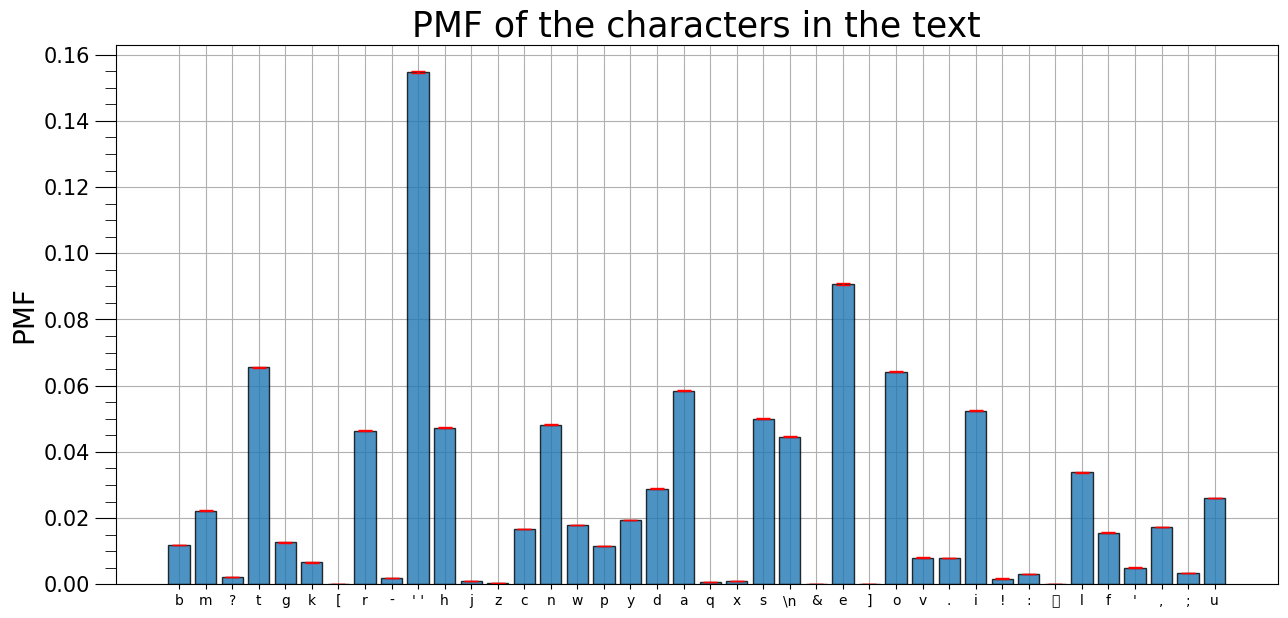

In [20]:
x_ticks_label = list(probabilities_text.keys())
x_ticks_label = list(map(lambda x: x.replace(' ', '\' \''), x_ticks_label))
x_ticks_label = list(map(lambda x: x.replace('\n', '\\n'), x_ticks_label))

fig, ax = plt.subplots(1, 1, figsize = (15, 7))

ax.bar(range(len(list(probabilities_text.keys()))), list(probabilities_text.values()), zorder = 2, edgecolor = 'black', alpha = 0.8)
errors_text = {c: np.sqrt(probabilities_text[c]*(1 - probabilities_text[c])/N)  for c in unique_characters_text} 
ax.errorbar(range(len(list(probabilities_text.keys()))), list(probabilities_text.values()), yerr = list(errors_text.values()),\
     fmt = 'none', color = 'red', zorder = 2,\
    capsize = 5, capthick = 1, elinewidth = 2)
ax.set_xticks(range(len(list(probabilities_text.keys()))))
ax.set_xticklabels(x_ticks_label, rotation = 0)
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='minor', labelsize=15, length=8)
ax.tick_params(axis='x', which='minor', labelsize=0, length=0)
ax.grid(zorder = 1)
ax.set_ylabel('PMF', fontsize = 20)
ax.set_title('PMF of the characters in the text', fontsize = 25)






plt.show()

$$
\begin{equation}
    H[X,Y]=H[Y]+H[X|Y]
\end{equation}
$$

\begin{equation}
    I[X:Y]=H[X]+H[Y]-H[X,Y]=H[Y]-H[Y|X]=H[X]-H[X|Y]
\end{equation}

In [34]:
unique_characters = list(set(text))
informations = {c: np.log2(1/probabilities[c]) for c in unique_characters}

In [35]:
def mutual_information(p, q, text, n): # p and q are the two characters, text is the text and n is the distance between the two characters
    inf_p = informations[p]

    char_n_distance = '' # string of the characters at a distance n from q

    for i, character in enumerate(text):
        if i + n < len(text) - 1:
            if character == q:
            
                char_n_distance += text[i + n] # add the character at a distance n from q
            else:
                continue


    
    probability_p = char_n_distance.count(p)/len(char_n_distance) # probability of p at a distance n from q

    conditional_information = - np.log2(probability_p) # conditional information of p given q

    mutual_information = inf_p - conditional_information # mutual information of p and q

    return mutual_information             

In [36]:


all_correlations = np.zeros(10)

for n in range(1, 11):
    mutuals = np.zeros(len(unique_characters)**2)
    i = -1
    for c1 in unique_characters:
        for c2 in unique_characters:
            i += 1
            mutuals[i] = mutual_information(c1, c2, text, n)
    all_correlations[n - 1] = np.mean(mutuals[~ np.isnan(mutuals* 0)])


/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_6356/588635328.py:18: RuntimeWarning: divide by zero encountered in log2
  conditional_information = - np.log2(probability_p) # conditional information of p given q
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_6356/147556385.py:10: RuntimeWarning: invalid value encountered in multiply
  all_correlations[n - 1] = np.mean(mutuals[~ np.isnan(mutuals* 0)])


In [37]:
def exponential(x, a, tau):
    return a * np.exp( -x / tau)

In [38]:
popt, pcov = optimize.curve_fit(exponential, np.arange(1, 11), -all_correlations)

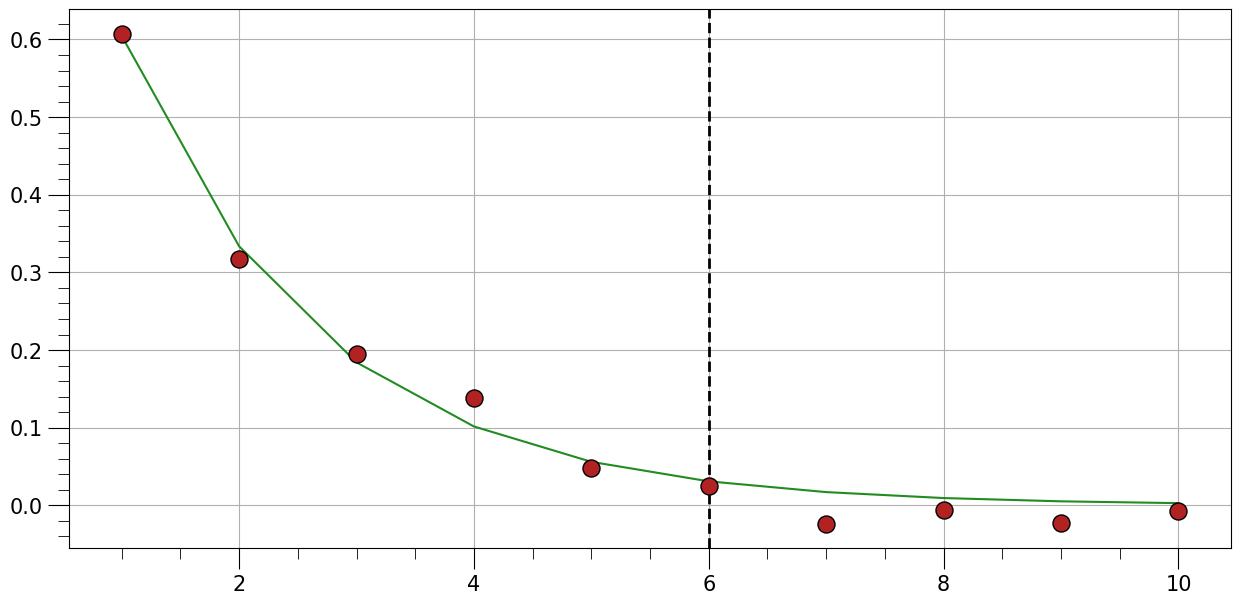

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.scatter(range(1, 11), -all_correlations, label = 'data', zorder = 4, s = 150, edgecolor = 'black', color = 'firebrick')
ax.plot(np.arange(1, 11), exponential(np.arange(1, 11), *popt), label = 'fit', zorder = 3, color = 'forestgreen')
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.minorticks_on()
ax.axvline(6, color = 'black', linestyle = '--', zorder = 2, linewidth = 2)
ax.grid(zorder = 1)

In [57]:
independent_strings = textwrap.wrap(text, 6, replace_whitespace = False)